In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')


Libraries Import Succesfull


In [2]:
site_browsing=pd.read_csv('Problem2_Site_BrowingBehavior.csv', delimiter='\t',header=None) 
site_browsing.columns=['Timestamp', 'UserID','Website_section_visited']
site_browsing.head()


,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [3]:
final_conversion=pd.read_csv('Problem2_FInalConversions.csv',sep="\t", header = None)
final_conversion.columns=['Timestamp', 'UserID', 'Products_Purchased', 'Cart_Value']
final_conversion.head()


,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [4]:
#Converting to datatime format
final_conversion['Timestamp']=pd.to_datetime(final_conversion['Timestamp'])
final_conversion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           79795 non-null  datetime64[ns]
 1   UserID              79795 non-null  int64         
 2   Products_Purchased  79795 non-null  object        
 3   Cart_Value          79795 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [5]:
#Merging two Dataframes
df_final=pd.merge(final_conversion,site_browsing, on=['UserID'], how='inner', left_index=True, right_index=True)
df_final.shape


(79795, 6)

In [6]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


#### We can calculate timediff and based on it we can try to say like time spend Vs Product purchased 
#### But seen that in Problem statement hint we can calculate product purchased = no of timestamp for each user 
#### so just commenting below section of code ..


In [7]:
'''
# converting timediff in seconds.. and adding this column in dataframe 

import datetime as dt

#if pd.to_datetime(df_final['Timestamp_y']) > pd.to_datetime(df_final['Timestamp_x']):
#    diff = (pd.to_datetime(df_final['Timestamp_y']) - pd.to_datetime(df_final['Timestamp_x'])).astype('timedelta64[s]')
#else:
#    diff = (pd.to_datetime(df_final['Timestamp_x']) - pd.to_datetime(df_final['Timestamp_y'])).astype('timedelta64[s]')
    
#diff = (pd.to_datetime(df_final['Timestamp_y']) - pd.to_datetime(df_final['Timestamp_x'])).astype('timedelta64[s]')
diff = (pd.to_datetime(df_final['Timestamp_x']) - pd.to_datetime(df_final['Timestamp_y'])).astype('timedelta64[s]')
diff.head()

df_final['TimeDiffInSeconds'] = diff

df_final.head()
'''



"\n# converting timediff in seconds.. and adding this column in dataframe \n\nimport datetime as dt\n\n#if pd.to_datetime(df_final['Timestamp_y']) > pd.to_datetime(df_final['Timestamp_x']):\n#    diff = (pd.to_datetime(df_final['Timestamp_y']) - pd.to_datetime(df_final['Timestamp_x'])).astype('timedelta64[s]')\n#else:\n#    diff = (pd.to_datetime(df_final['Timestamp_x']) - pd.to_datetime(df_final['Timestamp_y'])).astype('timedelta64[s]')\n    \n#diff = (pd.to_datetime(df_final['Timestamp_y']) - pd.to_datetime(df_final['Timestamp_x'])).astype('timedelta64[s]')\ndiff = (pd.to_datetime(df_final['Timestamp_x']) - pd.to_datetime(df_final['Timestamp_y'])).astype('timedelta64[s]')\ndiff.head()\n\ndf_final['TimeDiffInSeconds'] = diff\n\ndf_final.head()\n"

In [8]:
'''
# As per the given timestamp if we do y - x we got 90% -ve values as diff , 
# hence done x-y and converted -ve 1033 values to positive 
# checking any value is > 3600 - which gives me confident like no data having timetime above 1 Hour 

df_final['TimeDiffInSeconds'] = df_final['TimeDiffInSeconds'].abs()
print (df_final.head())
print ("\n")
print ("No diff values > 1 Hour", (df_final['TimeDiffInSeconds'] > 3600).any())

'''


'\n# As per the given timestamp if we do y - x we got 90% -ve values as diff , \n# hence done x-y and converted -ve 1033 values to positive \n# checking any value is > 3600 - which gives me confident like no data having timetime above 1 Hour \n\ndf_final[\'TimeDiffInSeconds\'] = df_final[\'TimeDiffInSeconds\'].abs()\nprint (df_final.head())\nprint ("\n")\nprint ("No diff values > 1 Hour", (df_final[\'TimeDiffInSeconds\'] > 3600).any())\n\n'

In [9]:
# # In Above step we have calculated the time diff hence dropping TimeStamp column from df 
#df_final.head()
#df = df_final.drop(['Timestamp_x','Timestamp_y'],axis=1)
#df_final.shape


In [10]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [11]:
# Checked NULL values if any 
df_final.isnull().any()

Timestamp_x                False
UserID                     False
Products_Purchased         False
Cart_Value                 False
Timestamp_y                False
Website_section_visited    False
dtype: bool

In [12]:
df_final['Website_section_visited'].unique()     # gives Unique sections 
# df_final['Products_Purchased'].unique().size   #  Many product like 13066, which is not useful as of now for decision making 

array(['product', 'default', 'product-listing-category', 'content',
       'home', 'cart', 'product-listing-search', 'iroa', 'shoplive',
       'productNotFound', 'product-listing-custom', 'signupcomplete'],
      dtype=object)

In [13]:
df_final.describe()

,UserID,Cart_Value
count,7.979500e+04,79795.000000
mean,3.440433e+18,69.786231
std,3.052801e+18,116.348855
min,0.000000e+00,1.000000
25%,0.000000e+00,32.500000
50%,3.017190e+18,47.640000
75%,6.118151e+18,75.340000
max,9.223308e+18,7324.800000


In [14]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [15]:
#adding registered user and non-registered user 
df_final['nonRegisteredUser'] = df_final['UserID'].apply(lambda x: x<=0 )

df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited,nonRegisteredUser
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product,True
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product,True
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default,True
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category,True
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content,True


####  Calculating number of user per timestamp to get the peak time ...
####  As per below data & figure we can see that peak time is between 1 to 2 AM..

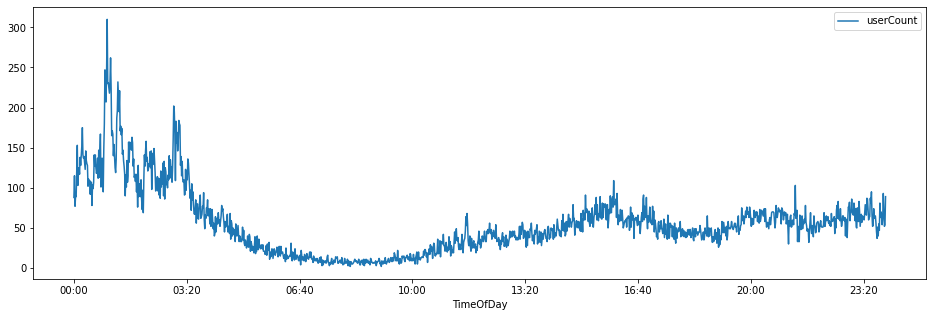

In [16]:

df_time = df_final.copy()
df_time['TimeOfDay'] = df_time['Timestamp_x'].apply(lambda x:str(x)[11:16])
df_timeAnalysis= df_time.groupby('TimeOfDay')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'userCount'})

df_timeAnalysis= df_timeAnalysis.sort_values("TimeOfDay")
#df_timeAnalysis.head()
df_timeAnalysis.plot(x='TimeOfDay',y='userCount',figsize=(16,5))

#### Registered User Vs Non-Registered User Analysis 

In [17]:
df_NRegAnalysis= df_final.groupby('nonRegisteredUser')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'userCount'})

df_NRegAnalysis['percentile']= df_NRegAnalysis['userCount'].apply(lambda x:x/len(df_final)*100)

df_NRegAnalysis.head()

,nonRegisteredUser,userCount,percentile
0,False,59598,74.68889
1,True,20197,25.31111


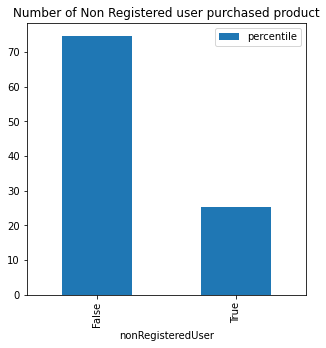

In [18]:
df_NRegAnalysis.plot.bar(x="nonRegisteredUser", y="percentile", rot=90, title="Number of Non Registered user purchased product",figsize=(5,5));


#### Analysis Products_purchased Vs UserCount percentile for <font color=red>Non-Registered User</font>

In [19]:
df_prodAnalysis_final= df_final[df_final['nonRegisteredUser']==True].groupby('Products_Purchased')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'userCount'})
df_prodAnalysis_final['percentile']= df_prodAnalysis_final['userCount'].apply(lambda x:x/len(df_final)*100)
df_prodAnalysis_final = df_prodAnalysis_final.sort_values("userCount",ascending=False)
df_prodAnalysis_final

,Products_Purchased,userCount,percentile
1651,A293532,1640,2.055267
2856,H211394,1439,1.803371
3740,K45766,1438,1.802118
2849,H211370,1226,1.536437
2860,H211397,423,0.530108
...,...,...,...
1671,"A293748,A293753,A290983",1,0.001253
1673,A293755,1,0.001253
1675,A293764,1,0.001253
1676,A293770,1,0.001253


#### Analysis Products_purchased Vs UserCount percentile for <font color=red>Registered User</font>

In [20]:
df_prodAnalysis_final= df_final[df_final['nonRegisteredUser']==False].groupby('Products_Purchased')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'userCount'})
df_prodAnalysis_final['percentile']= df_prodAnalysis_final['userCount'].apply(lambda x:x/len(df_final)*100)

df_prodAnalysis_final = df_prodAnalysis_final.sort_values("userCount",ascending=False)
df_prodAnalysis_final

,Products_Purchased,userCount,percentile
9654,K45766,4756,5.960273
7409,H211394,3729,4.673225
7397,H211370,3694,4.629363
4252,A293532,3158,3.957641
7413,H211397,1011,1.266997
...,...,...,...
1999,"A277948,A277948,A283726,A283726",1,0.001253
5821,E230703,1,0.001253
2001,A277955,1,0.001253
2002,A277958,1,0.001253


#### Overall which <font color=red>product sold atmost Analysis </font>

In [21]:
# overall highest sold product
df_prodAnalysis_final= df_final.groupby('Products_Purchased')['Timestamp_x'].count().reset_index().rename(columns={'Timestamp_x': 'userCount'})
df_prodAnalysis_final['percentile']= df_prodAnalysis_final['userCount'].apply(lambda x:x/len(df_final)*100)

df_prodAnalysis_final = df_prodAnalysis_final.sort_values("userCount",ascending=False)
df_prodAnalysis_final

,Products_Purchased,userCount,percentile
11482,K45766,6194,7.762391
8766,H211394,5168,6.476596
8752,H211370,4920,6.165800
5072,A293532,4798,6.012908
8770,H211397,1434,1.797105
...,...,...,...
5163,"A293825,A293825",1,0.001253
5164,"A293825,A293825,A293825",1,0.001253
5166,"A293826,A269946,A281793",1,0.001253
5167,"A293828,A293828",1,0.001253


#### Preparing data for target variable 
#### Used Hint 3rd Point : and calculating total product purchase , Number of Time Visited, Based on TimeStamp value



In [22]:
df_prodAnalysis_final= df_final.groupby(['UserID','Products_Purchased']).agg([('Timestamp_x', 'count'), ('Cart_Value','sum')]).reset_index().rename(columns={'Timestamp_x': 'userCount'})

df_prodAnalysis_final.to_csv("temp1_df.csv")
df_temp = pd.read_csv("temp1_df.csv")
#df_temp.head()

df_temp_x = df_temp.drop(['Unnamed: 0','Cart_Value','Timestamp_y','Timestamp_y.1','Website_section_visited.1','nonRegisteredUser','nonRegisteredUser.1'],axis=1)
df_temp_x = df_temp_x[1:]
df_temp_x.UserID = df_temp_x.UserID.astype('int64')
df_temp_final = df_temp_x.sort_values("Website_section_visited",ascending=False)
df_temp_final


,UserID,Products_Purchased,Cart_Value.1,Website_section_visited
521,0,A272888,431.82000000000005,9
764,0,A277830,223.02,9
4089,0,T34477,212.7,9
1460,0,A290543,1175.64,9
3437,0,J346534,202.56,9
...,...,...,...,...
20826,2846342302026876416,A292234,119.08,1
20827,2846346377298007552,H210206,23.48,1
20828,2846387091884377088,"H211858,H211858,H211858",120.9,1
20829,2846577649571108352,K45766,89.96,1


#### calculating product count , Probability of purchase & Target Variable as per the Hint provided in Problem Statement 
#### Uncomment the section as per requirement 

In [24]:
# Adding product count by converting product_Purchased in a list and applying length function on it 


df_temp_final['Products_Purchased'] = df_temp_final.Products_Purchased.map(lambda x: [i.strip() for i in x.split(",")])
df_temp_final['Total_Product_Purchased'] = df_temp_final.Products_Purchased.apply(len)
#df_temp_final
df_temp_final.Total_Product_Purchased = df_temp_final.Total_Product_Purchased.astype('int64')
df_temp_final.Website_section_visited = df_temp_final.Website_section_visited.astype('int64')

df_temp_final['probability_of_product_purchased'] = (df_temp_final['Total_Product_Purchased'] / df_temp_final['Website_section_visited'])
#df_temp_final

df_temp_final['Cart_Value.1'] = df_temp_final['Cart_Value.1'].astype(float)

df_temp_final['Target_var'] = df_temp_final['probability_of_product_purchased'] * df_temp_final['Cart_Value.1']
df_temp_final


,UserID,Products_Purchased,Cart_Value.1,Website_section_visited,Total_Product_Purchased,probability_of_product_purchased,Target_var
521,0,[A272888],431.82,9,1,0.111111,47.980000
764,0,[A277830],223.02,9,1,0.111111,24.780000
4089,0,[T34477],212.70,9,1,0.111111,23.633333
1460,0,[A290543],1175.64,9,1,0.111111,130.626667
3437,0,[J346534],202.56,9,1,0.111111,22.506667
...,...,...,...,...,...,...,...
20826,2846342302026876416,[A292234],119.08,1,1,1.000000,119.080000
20827,2846346377298007552,[H210206],23.48,1,1,1.000000,23.480000
20828,2846387091884377088,"[H211858, H211858, H211858]",120.90,1,3,3.000000,362.700000
20829,2846577649571108352,[K45766],89.96,1,1,1.000000,89.960000


#### Dropping Product purchased as already we have taken count of it
#### Removing unwanted columns like UserID, Probability of product purchased and preparing final dataframe for modellling 

In [25]:
df_temp_final.info()

final_data_for_modelling = df_temp_final.drop(['Products_Purchased','probability_of_product_purchased','UserID'],axis=1)
final_data_for_modelling

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57298 entries, 521 to 57298
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   UserID                            57298 non-null  int64  
 1   Products_Purchased                57298 non-null  object 
 2   Cart_Value.1                      57298 non-null  float64
 3   Website_section_visited           57298 non-null  int64  
 4   Total_Product_Purchased           57298 non-null  int64  
 5   probability_of_product_purchased  57298 non-null  float64
 6   Target_var                        57298 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.5+ MB


,Cart_Value.1,Website_section_visited,Total_Product_Purchased,Target_var
521,431.82,9,1,47.980000
764,223.02,9,1,24.780000
4089,212.70,9,1,23.633333
1460,1175.64,9,1,130.626667
3437,202.56,9,1,22.506667
...,...,...,...,...
20826,119.08,1,1,119.080000
20827,23.48,1,1,23.480000
20828,120.90,1,3,362.700000
20829,89.96,1,1,89.960000


#### Till ABove I have some Analysis on Data and Final Extracted -Manipulated data for Medelling .

#### Now Split the data in Train & Test 
#### Apply Supervised Modelling 

In [26]:
final_data_for_modelling.Target_var = final_data_for_modelling.Target_var.astype('int64')
print (final_data_for_modelling)

#Step1:   Split the data
from sklearn.model_selection import train_test_split
#Split your target and descriptive features
X = final_data_for_modelling.drop(['Target_var'],axis=1)
y = final_data_for_modelling["Target_var"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_test.head()
X_test.shape




       Cart_Value.1  Website_section_visited  Total_Product_Purchased  \
521          431.82                        9                        1   
764          223.02                        9                        1   
4089         212.70                        9                        1   
1460        1175.64                        9                        1   
3437         202.56                        9                        1   
...             ...                      ...                      ...   
20826        119.08                        1                        1   
20827         23.48                        1                        1   
20828        120.90                        1                        3   
20829         89.96                        1                        1   
57298         54.00                        1                        1   

       Target_var  
521            47  
764            24  
4089           23  
1460          130  
3437           22  
...

(11460, 3)

#### Applied LogicticRegression on Continuous Target Data 
#### Checked Accuracy which is very low ..

In [27]:
#X_train.shape
#Step2  Fit the model to the training data

from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

logistic_model.coef_.shape

#Predict the test dataset from the model
y_pred=logistic_model.predict(X_test)




In [29]:
print(set(y_pred))

{89, 52, 44}


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Figure(576x432) AxesSubplot(0.125,0.125;0.775x0.755)


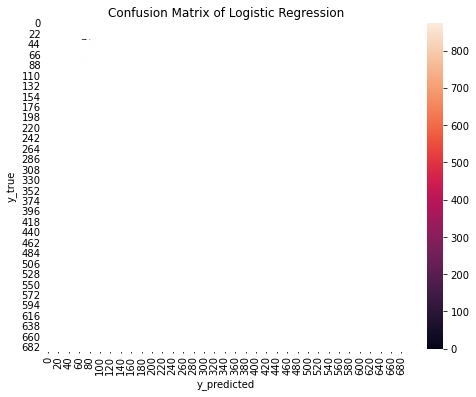

Logistic Regression accuracy is : 7.739965095986038


In [30]:
from sklearn.metrics import confusion_matrix

y_pred=logistic_model.predict(X_test)
#cm_lr = confusion_matrix(y_test,logistic_model.predict(X_test))
cm_lr = confusion_matrix(y_test,y_pred)
print(cm_lr)

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (8,6))
print(f,ax)
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)  



#### Hence Accuracy is very low in Logistic Regression , Applying another classification algoritham 
### e.g. DecisionTree 


55987    142
5532      49
53145    160
44443     26
17974     52
Name: Target_var, dtype: int64
(40108, 3)
(17190,)
[ 24 132  39 ...  30  69 720]


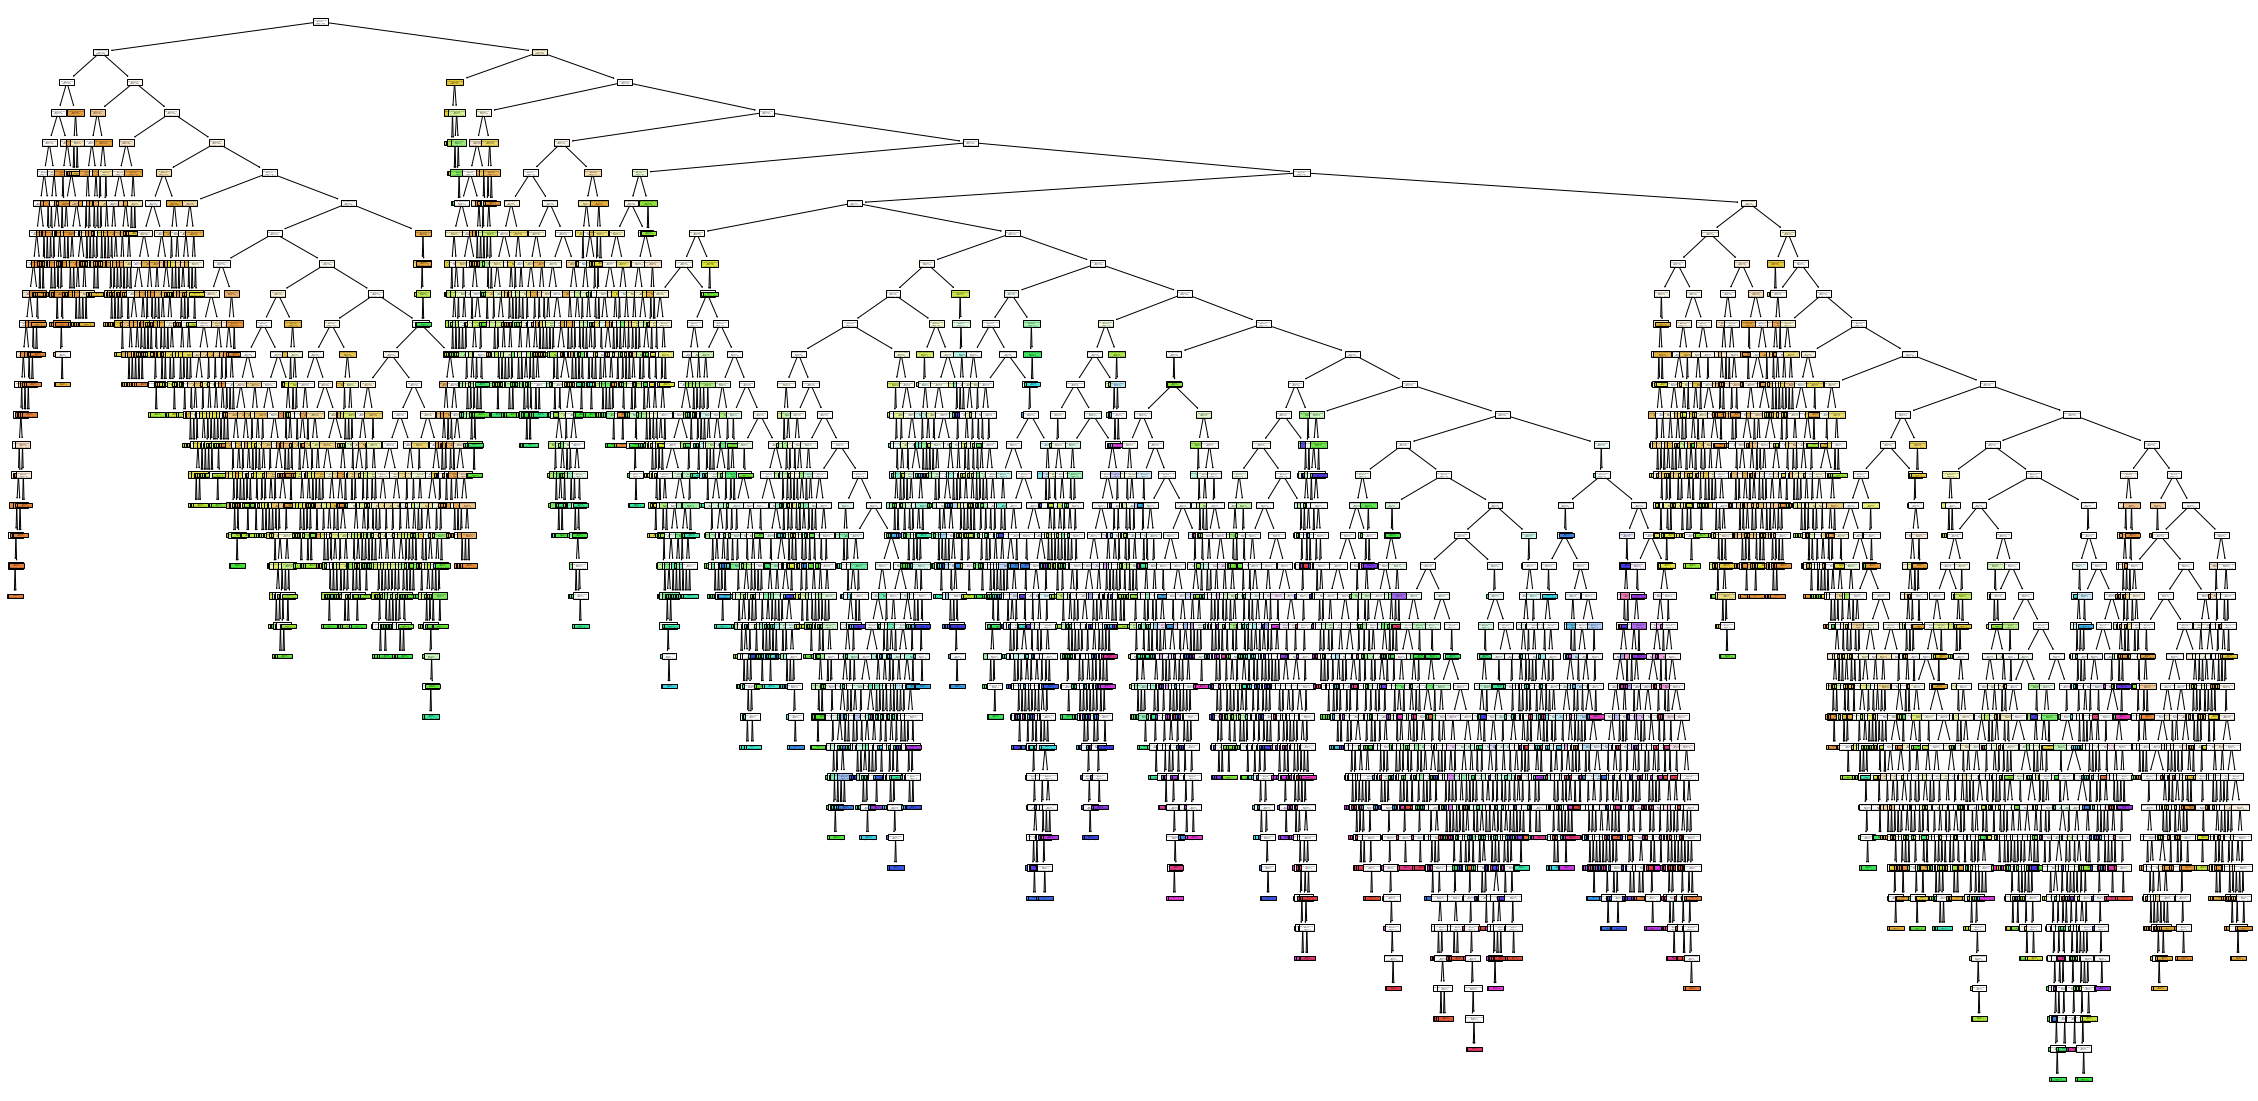

Accuracy M1: 0.9453170447934846


In [195]:
#Split the dataset into training and testing part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(y_train.head())
print(X_train.shape)
print(y_test.shape)

# Step 3: Fit the model on the training dataset
#Import Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()   #creating decision tree object 1 with default parameters gini index

#Train the model using the training sets
dt_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)
print(y_pred)

#print(dt_model.tree_)
#print(dt_model.feature_importances_)
#print(dt_model.max_features_)
#print(dt_model.n_classes_)
#print(dt_model.n_features_)
#print(dt_model.classes_)

#decision tree for model 1 with default parameters , spreaded to its maximum depth
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(dt_model,feature_names=X.columns,filled=True)
plt.show()
#plot_tree(dt_model, class_names=['No','Yes'], feature_names=X.columns,filled=True)


#  Measure the performance of the model
#import scikit learn metrics to calculate accuracy
#from sklearn import metrics
print ('Accuracy M1:',metrics.accuracy_score(y_test,y_pred))

#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred)) 



#### Getting Accuracy of 0.94 which is high as compare to Logistic Regression and its good result..
#### so finalizing DecisionTree as of now for this Target Value Prediction 
